In [1]:
import pandas as pd
from astropy.table import Table
import astropy
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [3]:
Elección = int(input('Seleccione el espectro a graficar, ingresando el número correspondiente a cada caso:\
                 1.- Stellar Continua, Z = 0.040\
                 2.- Stellar Continua, Z = 0.020\
                 3.- Stellar Continua, Z = 0.008\
                 4.- Stellar and Nebular Emission, Z = 0.040\
                 5.- Stellar and Nebular Emission, Z = 0.020\
                 6.- Stellar and Nebular Emission, Z = 0.008'))
if Elección == 1:
    filename = 'Stellar 0.040.dat'
elif Elección == 2:
    filename = 'Stellar 0.020.dat'
elif Elección == 3:
    filename = 'Stellar 0.008.dat'
elif Elección == 4:
    filename = 'Stellar&Nebular 0.040.dat'
elif Elección == 5:
    filename = 'Stellar&Nebular 0.020.dat'
elif Elección == 6:
    filename = 'Stellar&Nebular 0.008.dat'
else:
    print('Ha seleccionado un caracter incorrecto.')
    
    

    
data = Table.read(filename, format='ascii')

Seleccione el espectro a graficar, ingresando el número correspondiente a cada caso:                 1.- Stellar Continua, Z = 0.040                 2.- Stellar Continua, Z = 0.020                 3.- Stellar Continua, Z = 0.008                 4.- Stellar and Nebular Emission, Z = 0.040                 5.- Stellar and Nebular Emission, Z = 0.020                 6.- Stellar and Nebular Emission, Z = 0.0081


FileNotFoundError: [Errno 2] No such file or directory: 'Stellar 0.040.dat'

In [3]:
#Para graficar por edades
wavelength = np.log10((data['WAVELENGTH']))
luminosity = (data['1Myr'])
#plt.figure(figsize=(8, 8))
#plt.plot(wavelength, luminosity)
#plt.xlabel('log(Wavelength[Å])')
#plt.ylabel('Luminosity[erg/s*Å]')
#plt.xlim(2, 4)
#plt.ylim(34, 40)
#plt.show()

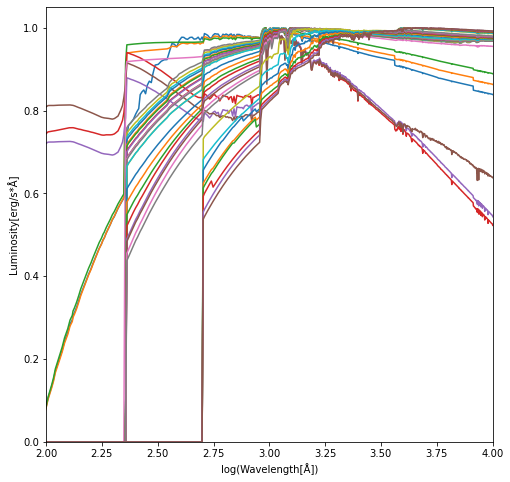

In [4]:
#column1 = fig1['1Myr']
#norm1 = (column1 - column1.min()) / (column1.max() - column1.min())


header = list(data.columns)
header[1:] 
lista = []
for value in header[1:]:
    lista.append(data[value])
plt.figure(figsize=(8, 8))
for value in lista:
    norm1 = (value - value.min()) / (value.max() - value.min())
    plt.plot(wavelength, norm1)
plt.xlabel('log(Wavelength[Å])')
plt.ylabel('Luminosity[erg/s*Å]')
plt.xlim(2, 4)
plt.ylim(0, 1.05)
plt.show()

In [6]:
#Filtros S-PLUS

#F0378 = Table.read('F0378.dat', format = 'ascii')
#F0395 = Table.read('F0395.dat', format = 'ascii')
#F0410 = Table.read('F0410.dat', format = 'ascii')
#F0430 = Table.read('F0430.dat', format = 'ascii')
#F0515 = Table.read('F0515.dat', format = 'ascii')
#F0660 = Table.read('F0660.dat', format = 'ascii')
#F0861 = Table.read('F0861.dat', format = 'ascii')
#g = Table.read('gSDSS.dat', format = 'ascii')
#i = Table.read('iSDSS.dat', format = 'ascii')
#r = Table.read('rSDSS.dat', format = 'ascii')
#u = Table.read('uJAVA.dat', format = 'ascii')
#z = Table.read('zSDSS.dat', format = 'ascii')



In [7]:
def Filter(lista):
    return [name for name in lista if re.search(r'dat', name)]

filtros=os.listdir('Filtros')
F = (Filter(filtros))
paths=['Filtros/'+name for name in F]
F

['gSDSS.dat',
 'F0861.dat',
 'F0378.dat',
 'rSDSS.dat',
 'uJAVA.dat',
 'F0660.dat',
 'F0395.dat',
 'F0515.dat',
 'F0410.dat',
 'zSDSS.dat',
 'F0430.dat',
 'iSDSS.dat']

In [8]:
aux = []
coordenadas = []
for value in paths:
    aux1 = (astropy.io.ascii.read(value))
    for val in aux1:
        aux = []
        for v in val:
            aux.append(v)
        coordenadas.append(aux)

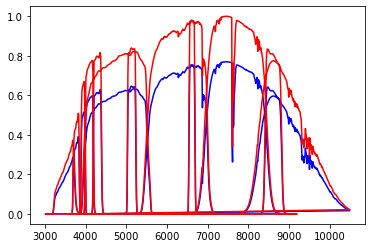

In [59]:
wvl = []
flujo = []
for par in coordenadas:
    wvl.append(par[0])
    flujo.append(par[1])
plt.plot(wvl, flujo, color='blue')

fluj = np.array(flujo)
flujo2 = fluj.reshape(1, -1)
for valor in flujo2:
    norma = (valor - min(flujo)) / (max(flujo) - min(flujo))
    plt.plot(wvl, norma, color='red')
plt.show()

In [51]:
gnr=[]
for value in paths:
    aux1=(astropy.io.ascii.read(value))
    gnr.append(aux1)

Requires legend? >NO


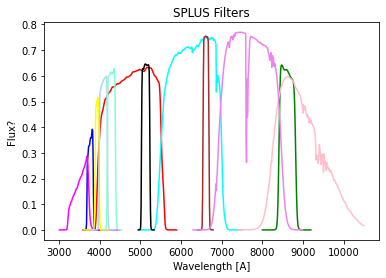

In [60]:
colors=['red','green','blue','cyan','magenta','brown','yellow','black','lightblue','pink','aquamarine','violet']
pedido=''
while pedido!='YES' and pedido!='NO':
    try:
        pedido=str(input('Requires legend? >')).upper()
  
    except(ValueError):
        print('Formato incorrecto')
    
for color,fil in zip(colors,F):
    #print(color)
    xau=colors.index(color)
    plt.plot(gnr[xau]['col1'],gnr[xau]['col2'],color)
    if pedido=='YES':
        plt.legend(F)
    #print(xau)
    
    plt.title('SPLUS Filters')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Flux?')
plt.show()